Sentiment Analysis using **Bag of Words Vectorization-Based Models**

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [254]:
data = pd.read_csv('sampled_5k.csv')
data.head()

,Sentence,Sentiment
0,already confirmed he wont be selling TSLA shares,positive
1,"damn, to think there are some TSLA bagholders ...",positive
2,My summary below:\n\n&amp;#x200B;\n\n|Stock Ti...,positive
3,There are so many more important things I'd ra...,positive
4,News and commentary:\n\nBezzle:\n\nhttps://car...,positive


In [255]:
data.Sentiment.value_counts()

positive    5000
negative    5000
Name: Sentiment, dtype: int64

In [256]:
#Assumption is that the neutral labeled samples have been taken out

#data = data[data.Sentiment != "neutral"]
#data.Sentiment.value_counts()

In [257]:
#Assumption is that the dataset is already balanced

#pos_count, neg_count = data['Sentiment'].value_counts()

#Undersampling data
#pos_data = data[data['Sentiment'] == 'positive']
#neg_data = data[data['Sentiment'] == 'negative']

#pos_under = pos_data.sample(neg_count)
#data = pd.concat([pos_under, neg_data], axis=0)

#data.Sentiment.value_counts()

In [258]:
data = data.sample(frac = 1, random_state = 42) #Data is shuffled

In [259]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [260]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
#cv = CountVectorizer(strip_accents = 'unicode', lowercase = True, stop_words = 'english', ngram_range = (1,1), min_df = 1, token_pattern = None, tokenizer = token.tokenize)
#text_counts = cv.fit_transform(data['Sentence'])

In [261]:
#Pre-Prcoessing and Bag of Word Vectorization using TFIDF Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', lowercase = True, stop_words = 'english', ngram_range = (1, 1), min_df = 1, token_pattern = None, tokenizer = token.tokenize)
text_counts = tfidf_vec.fit_transform(data['Sentence']) # fit train

In [262]:
#Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.20, random_state = 42, stratify = data['Sentiment']) #

In [263]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [264]:
#Caluclating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.682


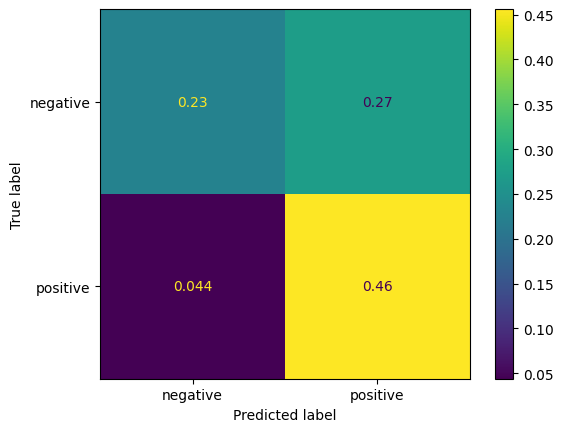

In [265]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

bi_labels = ['negative', 'positive']

cm = confusion_matrix(Y_test, predicted, normalize = 'all') 

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bi_labels)

disp.plot()
plt.show()

In [266]:
#For Model Testing
test_data = pd.read_csv('test_50.csv')
test_data.Sentiment.value_counts()

positive    25
negative    25
Name: Sentiment, dtype: int64

In [267]:
test_label = test_data['Sentiment'].tolist()
test_sentence = test_data['Sentence'].tolist()
test_counts = tfidf_vec.transform(test_data['Sentence'])
test_predicted = MNB.predict(test_counts)
score = metrics.accuracy_score(test_predicted, test_label)

print("Accuracy Score: ", score)

Accuracy Score:  0.7
